<h1>Global Terrorism - Team: Linear Digressors</h1>

- Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

- loading the dataset

In [2]:
data=pd.read_csv(r'C:\Users\manis\OneDrive\HackJSOM\Terroism.csv', encoding='latin-1')
data.shape

(181691, 135)

- data cleaning

In [40]:
np.sum(data.isnull())/len(data)

eventid               0.000000
iyear                 0.000000
imonth                0.000000
iday                  0.000000
approxdate            0.949150
extended              0.000000
resolution            0.987781
country               0.000000
country_txt           0.000000
region                0.000000
region_txt            0.000000
provstate             0.002317
city                  0.002389
latitude              0.025076
longitude             0.025081
specificity           0.000033
vicinity              0.000000
location              0.694564
summary               0.363964
crit1                 0.000000
crit2                 0.000000
crit3                 0.000000
doubtterr             0.000006
alternative           0.840328
alternative_txt       0.840328
multiple              0.000006
success               0.000000
suicide               0.000000
attacktype1           0.000000
attacktype1_txt       0.000000
                        ...   
propextent            0.647396
propexte

- Dropping the columns, which have more than 30% null values

In [5]:
data1=pd.DataFrame()
for col in data:
    if (np.sum(data[col].isnull())/len(data))<0.3:
        data1[col]=data[col]
print(data1.shape)        
data1.head()

(181691, 48)


,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,weapsubtype1_txt,nkill,nwound,property,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,...,NaN,1.0,0.0,0,0.0,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,...,NaN,0.0,0.0,0,1.0,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,NaN,1.0,0.0,0,0.0,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,Unknown Explosive Type,NaN,NaN,1,0.0,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,NaN,NaN,NaN,1,0.0,PGIS,-9,-9,1,1


In [8]:
pd.set_option('display.max_columns', None)
data1.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,gname,guncertain1,individual,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,nkill,nwound,property,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,1,1,1,0.0,0.0,1,0,1,Assassination,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,MANO-D,0.0,0,13,Unknown,NaN,NaN,1.0,0.0,0,0.0,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,1,1,1,0.0,0.0,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,23rd of September Communist League,0.0,0,13,Unknown,NaN,NaN,0.0,0.0,0,1.0,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,1,1,1,0.0,0.0,1,0,1,Assassination,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,Unknown,0.0,0,13,Unknown,NaN,NaN,1.0,0.0,0,0.0,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,Unknown,0.0,0,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,1,0.0,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,1,1,1,-9.0,0.0,1,0,7,Facility/Infrastructure Attack,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,217.0,United States,Unknown,0.0,0,8,Incendiary,NaN,NaN,NaN,NaN,1,0.0,PGIS,-9,-9,1,1


<h1>Year-wise Successful and Unsuccessful attacks</h1>

<b> Insights :</b>
- The frequency of successful terrorist attacks significantly increased after 2011 and so did successful preventions

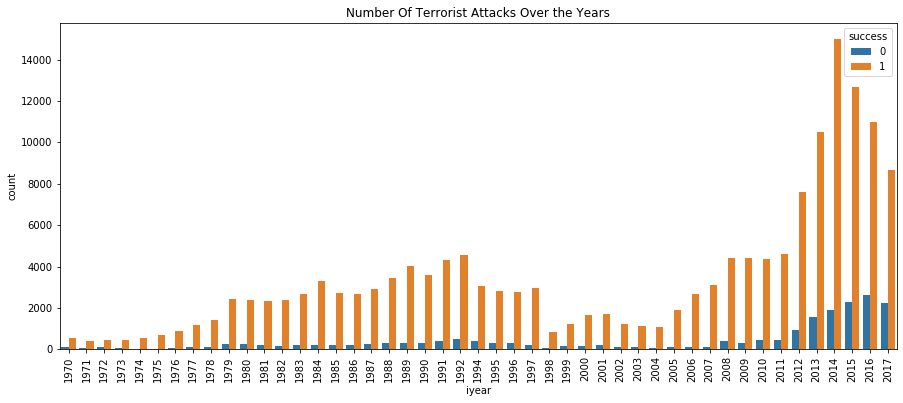

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(figsize=(15,6))
sns.countplot('iyear', data=data1, hue = 'success')
sns.xlabel = "Year"
sns.ylabel = "No. of terrorist activities"
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Attacks Over the Years')
plt.show()

<h1>Different ways in terrorist attacks</h1>

<b> Insights :</b>
- As usual, Bombing/Explosion is most common way of attack

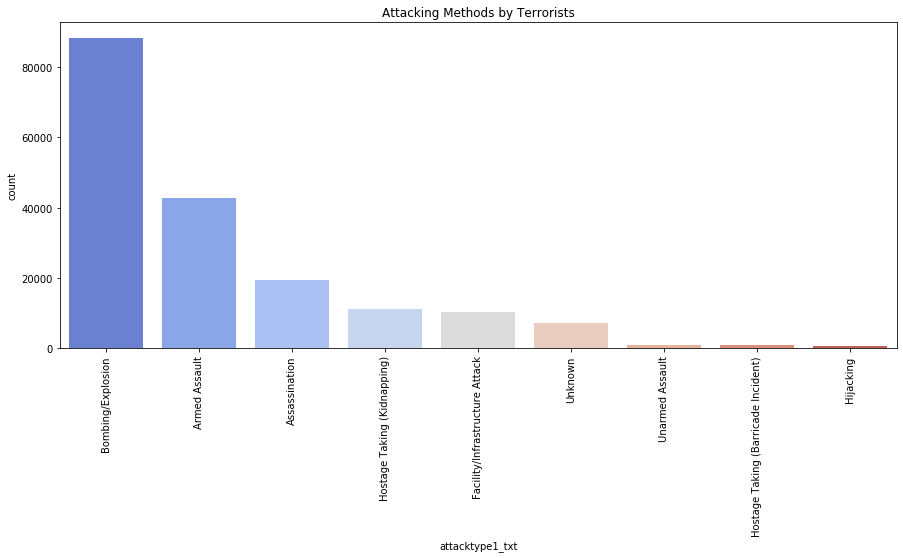

In [46]:
plt.subplots(figsize=(15,6))
sns.countplot('attacktype1_txt',data=data1,palette='coolwarm',order=data1['attacktype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Attacking Methods by Terrorists')
plt.show()

<h1> Attack Targeted types</h1>

<b> Insights :</b>
- Interestingly, military and police are the most target, after Public & Property

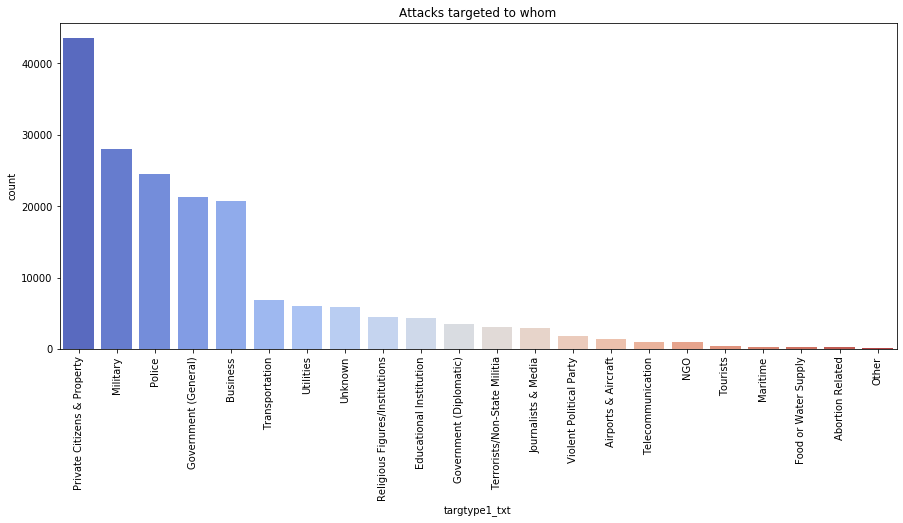

In [54]:
plt.subplots(figsize=(15,6))
sns.countplot('targtype1_txt',data=data1,palette='coolwarm',order=data1['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Attacks targeted to whom')
plt.show()

<h1>Weapons Type for attack</h1>

<b> Insights :</b>
- Explosives are the most effective for the terrorists

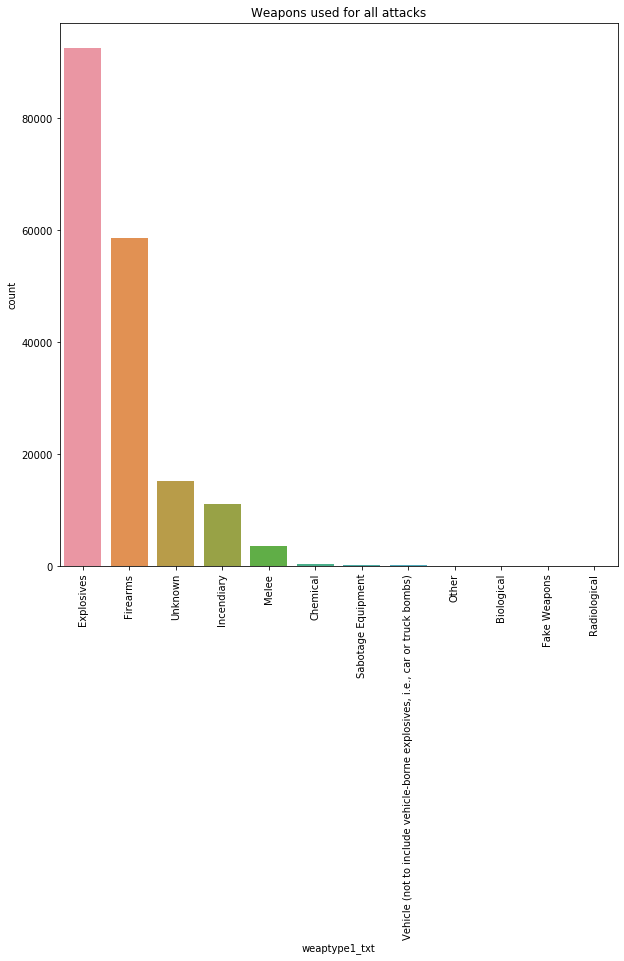

In [49]:
plt.subplots(figsize=(10,10))
sns.countplot("weaptype1_txt", order=data1['weaptype1_txt'].value_counts().index, data=data1)
plt.xticks(rotation=90)
plt.title('Weapons used for all attacks')
plt.show()

<h1>Successful Assasinations</h1>

<b> Insights :</b>
- Title of Figure: Trend of Successful Assassinations Across Continents

From the graph plot, we can see that the number of successful attacks increased over the years due to the growth of the terrorist group and the experience gained from each attack the group carries out.

We can say that regions such as Middle European and Middle Eastern Countries, the probability that an attack carried out will be successful is very high.


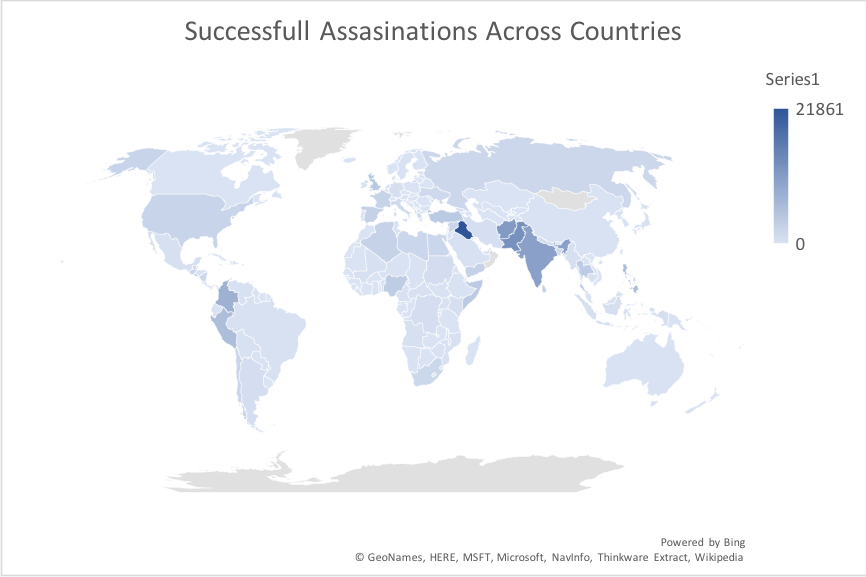

In [57]:
from IPython.display import Image
Image(r"C:\Users\manis\OneDrive\HackJSOM\Picture1.png")

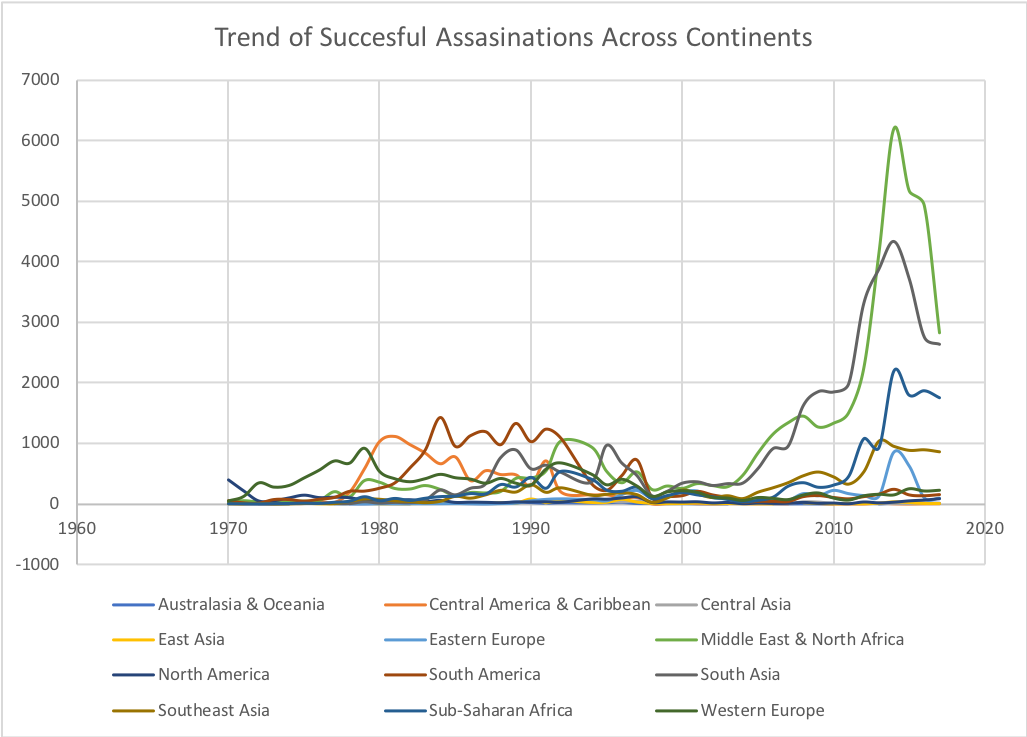

In [58]:
from IPython.display import Image
Image(r"C:\Users\manis\OneDrive\HackJSOM\Picture2.png")

<b> Insights :</b>
- Title of Figure: Number of people killed by Top 5 Terrorist Groups

From the Histogram plot, we see than the top 5 terrorist groups in the world contributed to almost 40% of all killings due to all terrorist groups across the world.


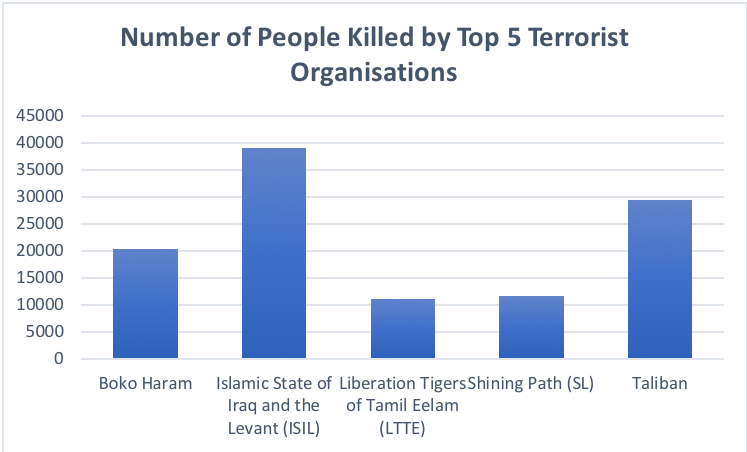

In [59]:
from IPython.display import Image
Image(r"C:\Users\manis\OneDrive\HackJSOM\Picture3.png")

<b> Insights :</b>
- Assualt Types of Top 5 Terrorist Groups

From the plot, we see that Bombings and explosions are the most used methodology by the terror groups for an attack.

ISIL still practices the method of taking hostages as a method

Methods such as Hijacking and Taking Hostages has been reduced to a very minute number due to high-security procedures in place for airport security. 


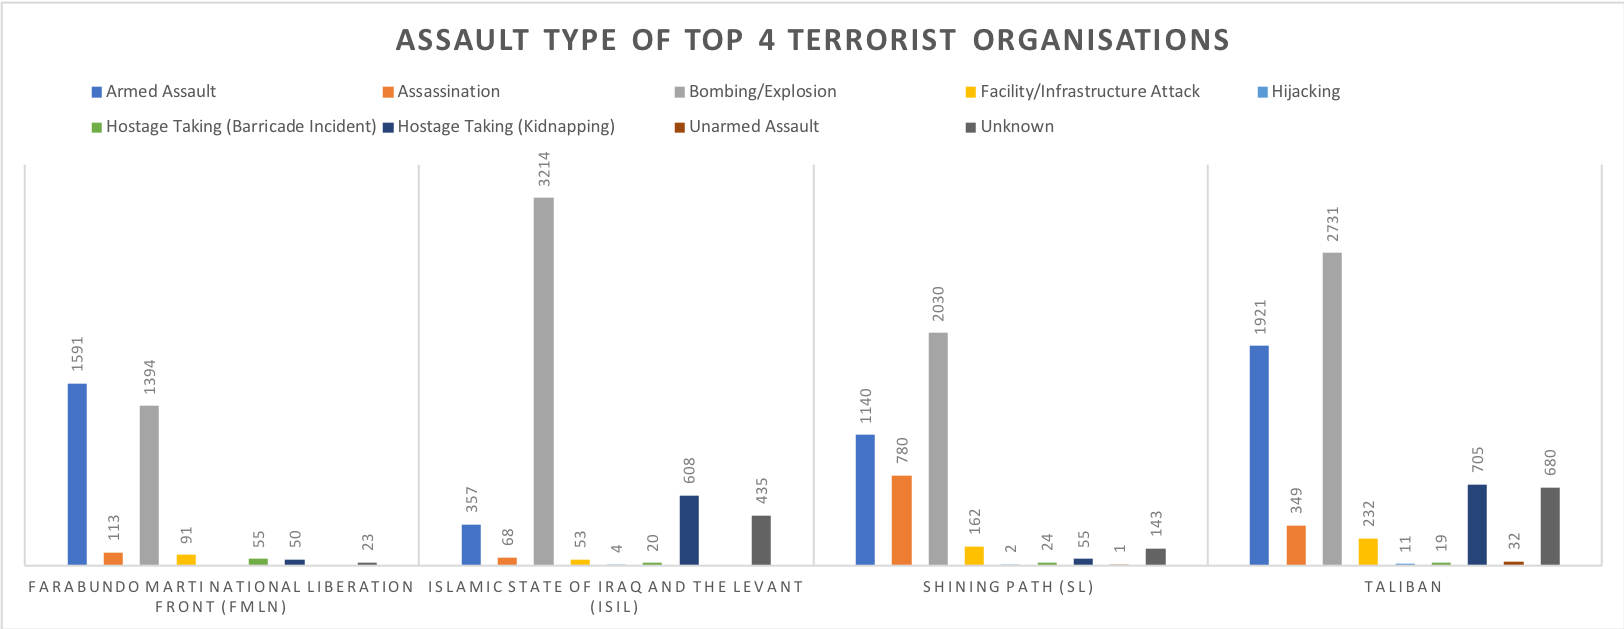

In [60]:
from IPython.display import Image
Image(r"C:\Users\manis\OneDrive\HackJSOM\Picture4.png")

<h1> Showing the latest attacks in world</h1>

<b> Insights :</b>
- Visualization shows the attacks in year 2016 & 2017, it is evident that most of attack was done in Middle East Asia, specially Iraq

<b>Note: Map image can be zoomed in to get exact count of country level attacks</b>

In [13]:
latitude = 0
longitude = 0
map_data=data1[['latitude','longitude','attacktype1_txt','iyear']]
#map_data=map_data.dropna()
map_data.head()
map_data=map_data[map_data.iyear>2016]
map_data=map_data.dropna()
print(map_data.shape)

limit = 1000
map_data = map_data.iloc[0:limit, :]

import folium

from folium import plugins

# let's start again with a clean copy of the map of San Francisco
sanfran_map = folium.Map(location = [latitude, longitude], zoom_start = 2)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(sanfran_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(map_data.latitude, map_data.longitude, map_data.attacktype1_txt):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
sanfran_map


<h1>Nationals targeted by terrorists</h1>

<b> Insights :</b>
- Clearly, it is seen terrorists are targeting Iraq, US and Pakistan nationals most, followed by India and El Salvador.

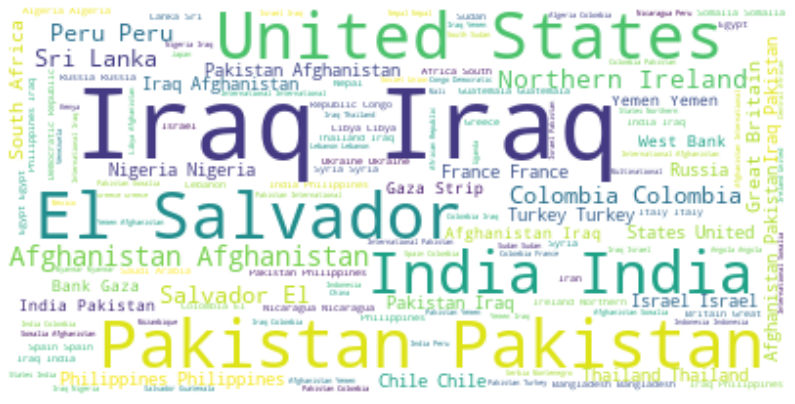

In [30]:
# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS
alice_novel = open('nat.txt', 'r').read()
stopwords = set(STOPWORDS)
# instantiate a word cloud object
alice_wc = WordCloud(
    background_color='white',
    max_words=10000,
    stopwords=stopwords
)

# generate the word cloud
alice_wc.generate(alice_novel)

fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18)
# display the word cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

<h1>Motive behinds the attcak</h1>

<b> Insights :</b>
- Apart from attacking Iraq, major motive behind terrorism is sectarian(religion).

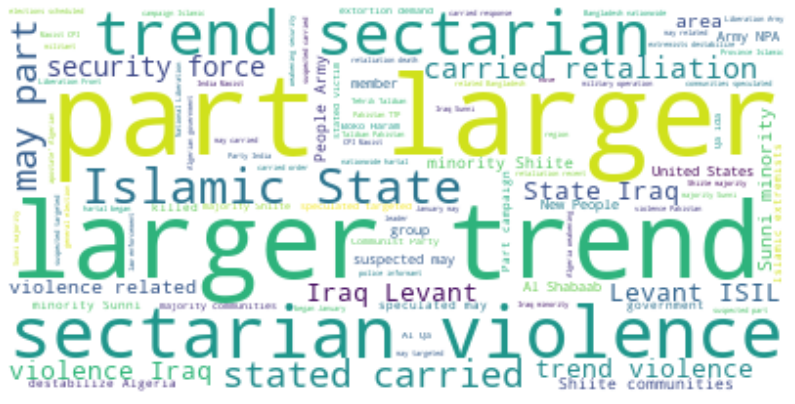

In [38]:
alice_novel = open('motive.txt', 'r').read()
stopwords = set(STOPWORDS)
# instantiate a word cloud object
alice_wc = WordCloud(
    background_color='white',
    max_words=10000,
    stopwords=stopwords
)

stopwords.add('specific')
stopwords.add('motive')
stopwords.add('Unknown')
stopwords.add('unknown')
stopwords.add('source')
stopwords.add('sources')
stopwords.add('noted')
stopwords.add('attack')
stopwords.add('claimed')
stopwords.add('responsibility')
stopwords.add('incident')


# generate the word cloud
alice_wc.generate(alice_novel)

fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18)
# display the word cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()